In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [26]:
bond_df = pd.read_csv('extracted_bond_data.csv', sep=";")
bond_df.columns = ["model_name", "predictors", "aug_num", "aug_size", "lookback", "dropout", "type", "t", "p", "l", "r_5", "r", "r_95"]
bond_df.describe()

,aug_num,aug_size,lookback,dropout,t,p,l,r_5,r,r_95
count,623.0,6.230000e+02,623.000000,623.000000,623.000000,6.230000e+02,623.000000,623.000000,623.000000,623.000000
mean,50.0,2.000000e-01,2.006421,0.280578,-0.314841,6.104500e-02,0.000035,0.000034,0.000035,0.000036
std,0.0,1.972229e-15,1.413062,0.172064,8.930282,1.840637e-01,0.000181,0.000177,0.000180,0.000184
min,50.0,2.000000e-01,0.000000,0.000000,-26.096218,2.476200e-46,0.000004,0.000004,0.000004,0.000004
25%,50.0,2.000000e-01,1.000000,0.200000,-6.939036,2.252030e-17,0.000004,0.000004,0.000004,0.000004
50%,50.0,2.000000e-01,2.000000,0.300000,-0.260506,3.891088e-09,0.000005,0.000005,0.000005,0.000005
75%,50.0,2.000000e-01,3.000000,0.400000,6.134166,1.051322e-03,0.000005,0.000005,0.000005,0.000005
max,50.0,2.000000e-01,4.000000,0.500000,26.209558,9.999999e-01,0.002535,0.002507,0.002554,0.002585


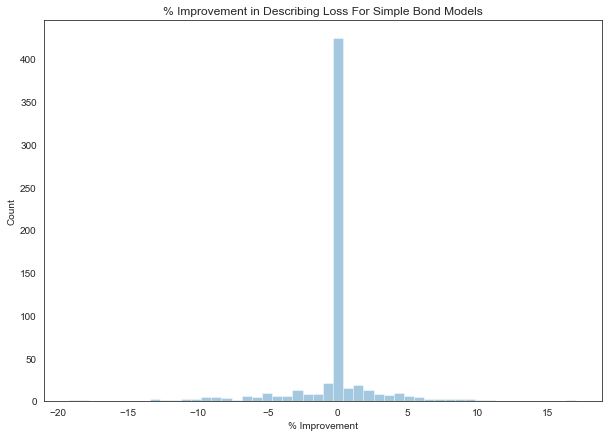

In [28]:
bond_df['improvement'] = (bond_df['r'] - bond_df['l']) / bond_df['r'] * 100

fig = plt.figure(figsize=(10,7))
sns.distplot(bond_df['improvement'], kde=False, ax=fig.gca())
plt.title('% Improvement in Describing Loss For Simple Bond Models')
plt.ylabel('Count')
plt.xlabel('% Improvement')
plt.show()

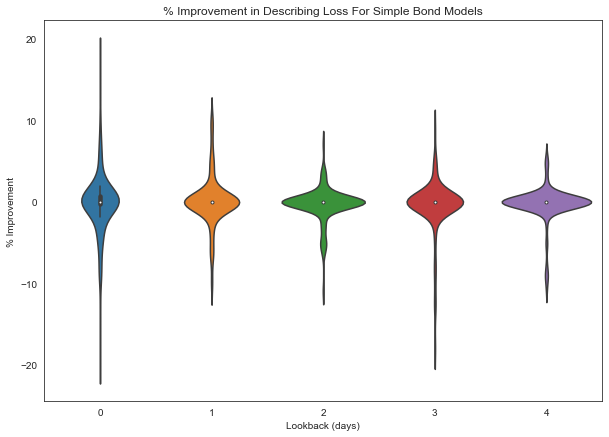

In [19]:
fig = plt.figure(figsize=(10,7))
sns.violinplot(x=bond_df['lookback'], y=bond_df['improvement'], ax=fig.gca())
plt.title('% Improvement in Describing Loss For Simple Bond Models')
plt.ylabel('% Improvement')
plt.xlabel('Lookback (days)')
plt.show()

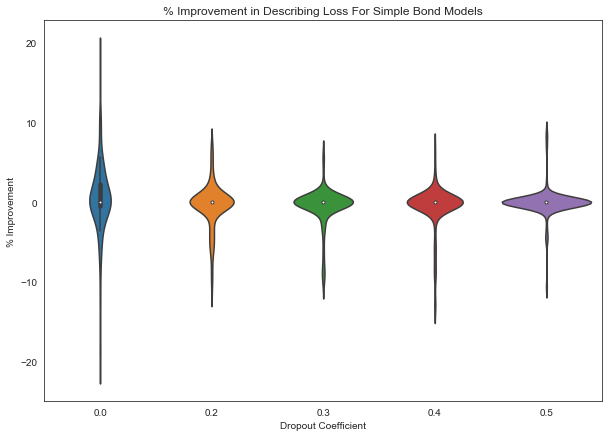

In [21]:
fig = plt.figure(figsize=(10,7))
sns.violinplot(x=bond_df['dropout'], y=bond_df['improvement'], ax=fig.gca())
plt.title('% Improvement in Describing Loss For Simple Bond Models')
plt.ylabel('% Improvement')
plt.xlabel('Dropout Coefficient')
plt.show()

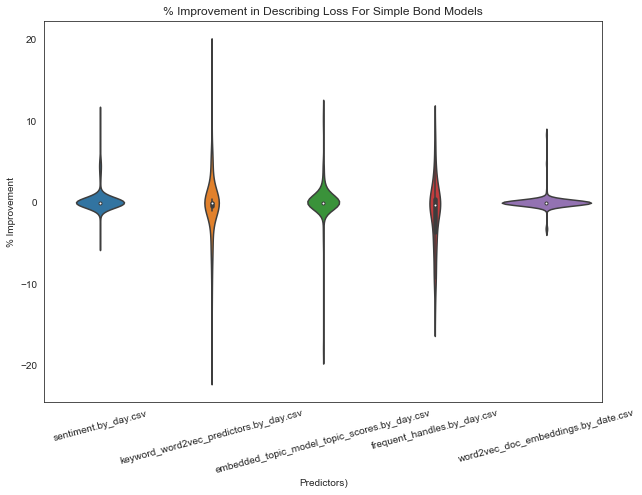

In [29]:
fig = plt.figure(figsize=(10,7))
ax = sns.violinplot(x=bond_df['predictors'], y=bond_df['improvement'], ax=fig.gca())

ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

plt.title('% Improvement in Describing Loss For Simple Bond Models')
plt.ylabel('% Improvement')
plt.xlabel('Predictors)')
plt.show()

In [32]:
bond_df.iloc[np.argsort(bond_df['improvement'])].tail()

,model_name,predictors,aug_num,aug_size,lookback,dropout,type,t,p,l,r_5,r,r_95,improvement
309,model_211,keyword_word2vec_predictors.by_day.csv,50,0.2,1,0.0,regressor,9.249510,4.742644e-15,0.000006,0.000005,0.000007,0.000008,9.521559
197,model_1811,embedded_topic_model_topic_scores.by_day.csv,50,0.2,1,0.0,regressor,13.821067,7.675662e-25,0.000004,0.000004,0.000005,0.000005,9.627342
114,model_1211,sentiment.by_day.csv,50,0.2,1,0.0,regressor,13.686560,1.453966e-24,0.000005,0.000005,0.000005,0.000006,10.508939
247,model_1901,embedded_topic_model_topic_scores.by_day.csv,50,0.2,0,0.0,regressor,10.815605,1.833793e-18,0.000009,0.000009,0.000010,0.000012,10.838515
480,model_51,keyword_word2vec_predictors.by_day.csv,50,0.2,0,0.0,regressor,18.952573,1.038539e-34,0.000008,0.000008,0.000010,0.000011,17.050919
